## Importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus
import keras
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from scipy.stats import uniform
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from IPython.display import Image
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from ann_visualizer.visualize import ann_viz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import ensemble

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
train_data = pd.read_csv('creditcard.csv')
features = train_data[train_data.columns[:-1]]
target = train_data[train_data.columns[-1]]

## Data exploration

In [6]:
train_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
train_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
train_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,-1.040458,-0.031513,-0.188093,-0.084316,0.041333,-0.302620,-0.660377,0.167430,-0.256117,0.382948,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [9]:
train_data[train_data.columns[-1]].value_counts()

0    284315
1       492
Name: Class, dtype: int64

## Data Manipulation

In [10]:
os =  RandomOverSampler(ratio=0.8)
features, target = os.fit_sample(features, target)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [11]:
features.shape, target.shape

((511767, 30), (511767,))

## Modelling the data

In [12]:
scaler = preprocessing.StandardScaler()
standardized = scaler.fit_transform(features)

In [13]:
standardized

array([[-1.83964291,  0.14226979, -0.46600083, ...,  0.05783651,
        -0.12280581,  0.17966201],
       [-1.83964291,  0.62416722, -0.3714757 , ..., -0.08973863,
        -0.04180959, -0.39827803],
       [-1.83962213,  0.14254421, -0.81946252, ..., -0.13774581,
        -0.21041617,  1.08057665],
       ...,
       [ 0.77054804,  0.75594362, -0.14642503, ..., -0.04765118,
         0.00609271, -0.39619331],
       [-0.44428003,  0.0545484 , -0.33321857, ...,  0.26372203,
         0.49697378,  1.51738493],
       [-0.88258813,  0.15178167,  0.05253497, ...,  0.51116718,
         0.58914437, -0.40492554]])

In [14]:
X_train,X_test,y_train,y_test = train_test_split(standardized,target,test_size = 0.3,random_state = 1)

## Model Building

### Logistic Regression

In [ ]:
logistic_regression = LogisticRegression(random_state=0, max_iter=10000)
model = logistic_regression.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9538920478600413

In [ ]:
logistic = LogisticRegression(max_iter= 10000)

penalty = ["l1", "l2"]

C = np.logspace(0, 4, 20)

hyperparameters = dict(C=C, penalty=penalty)

gridsearch = GridSearchCV(logistic, hyperparameters, cv=5, n_jobs=-1, verbose=1)

best_model = gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  8.0min finished


In [ ]:
best_model

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 1.6...0,
       6.95192796e+00, 1.12883789e+01, 1.83298071e+01, 2.97635144e+01,
       4.83293024e+01, 7.84759970e+01, 1.27427499e+02, 2.06913808e+02,
       3.35981829e+02, 5.45559478e+02, 8.85866790e+02, 1.43844989e+03,
       2.33572147e+03, 3.79269019e+03, 6.15848211e+03, 1.00000000e+04]),
    

In [ ]:
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 11.28837891684689


In [ ]:
y_pred = best_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9538985612026236

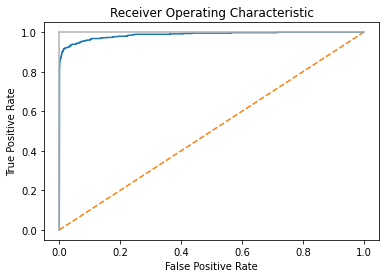

In [ ]:
target_probabilities = best_model.predict_proba(X_test)[:,1]

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,
target_probabilities)

plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")                                                              
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## Decision Tree Classifier

In [9]:
decisiontree = DecisionTreeClassifier(random_state=0)
model = decisiontree.fit(X_train,y_train)

In [10]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9997459796392911

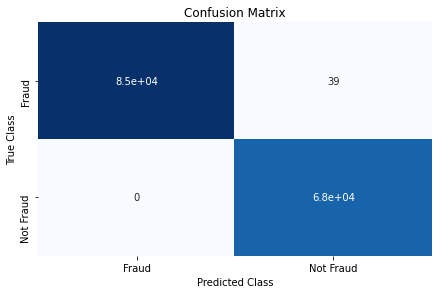

In [21]:
matrix = confusion_matrix(y_test, y_pred)

dataframe = pd.DataFrame(matrix,index = ['Fraud','Not Fraud'],columns = ['Fraud','Not Fraud'])

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85397
           1       1.00      1.00      1.00     68134

    accuracy                           1.00    153531
   macro avg       1.00      1.00      1.00    153531
weighted avg       1.00      1.00      1.00    153531



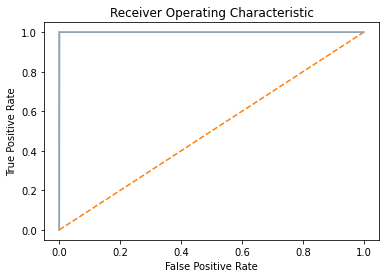

In [22]:
target_probabilities = model.predict_proba(X_test)[:,1]

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,
target_probabilities)

plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")                                                              
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

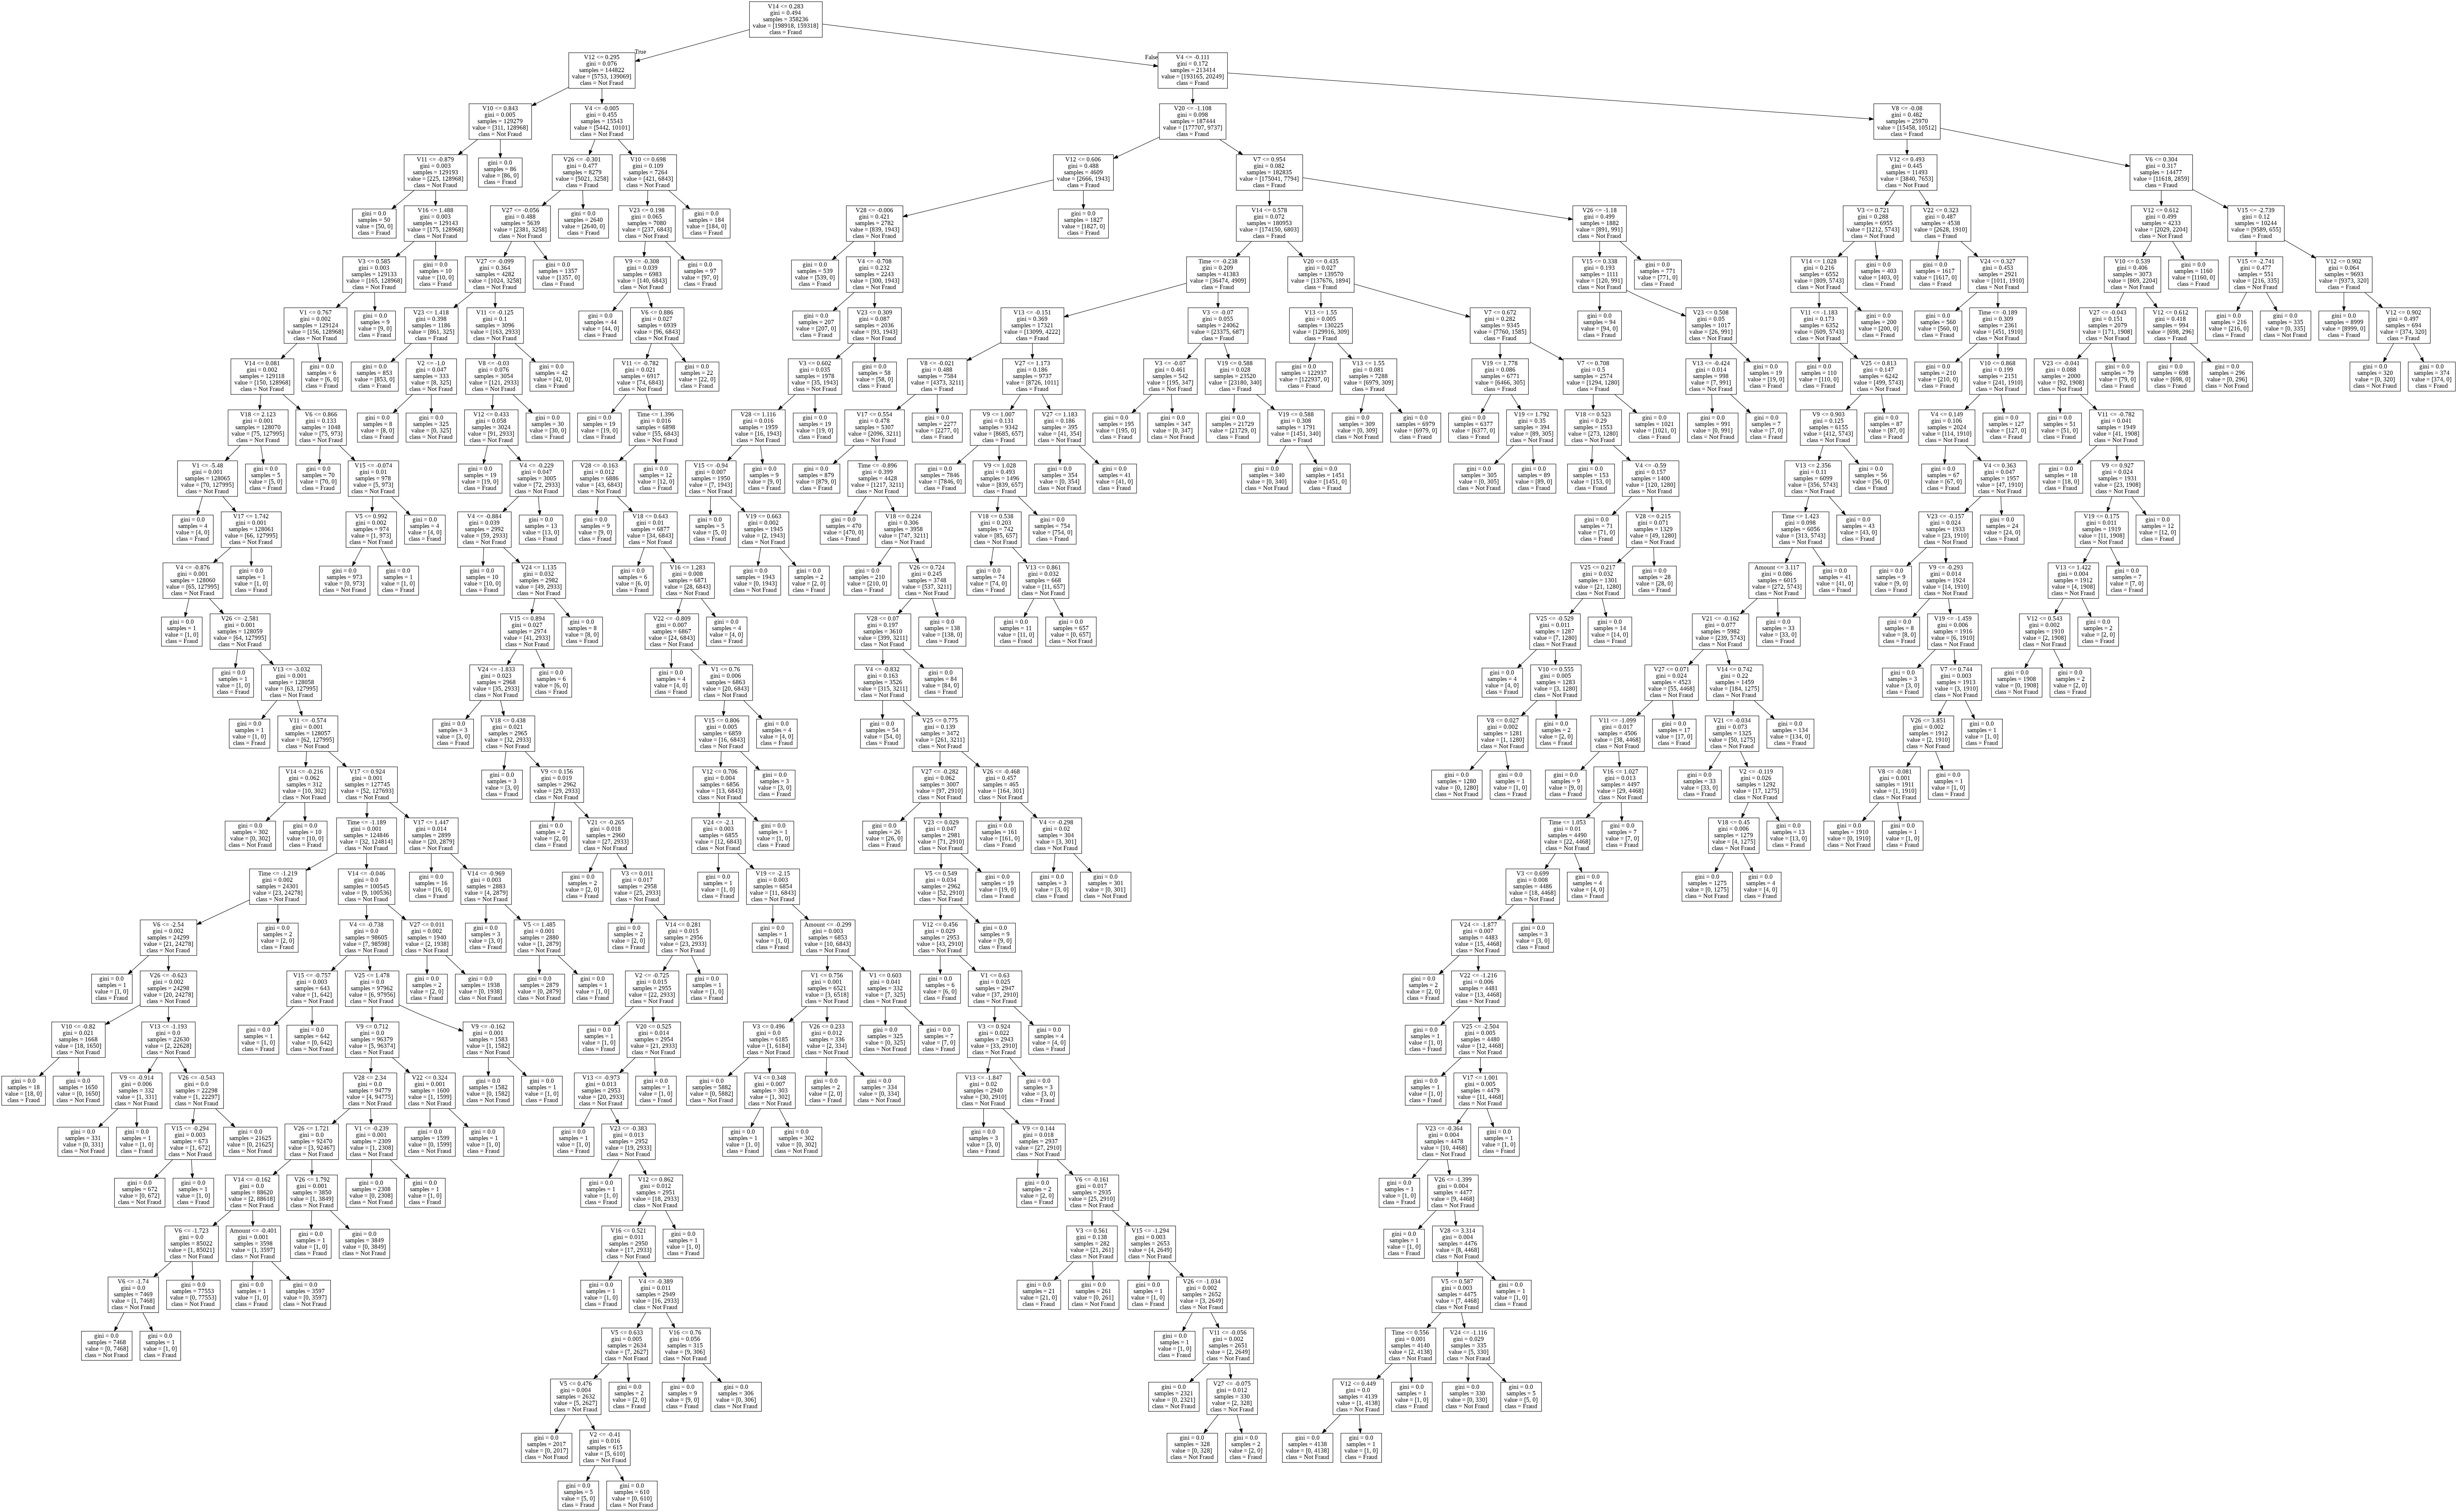

In [28]:
dot_data = tree.export_graphviz(decisiontree,
out_file=None,
feature_names=train_data.columns[:-1],
class_names=['Fraud','Not Fraud'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

## Random Forest Classifier

In [31]:
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
model = randomforest.fit(X_train, y_train)

In [32]:
y_pred = model.predict(X_test)
accuracy_score(y_test,y_pred)

0.9999478932593417

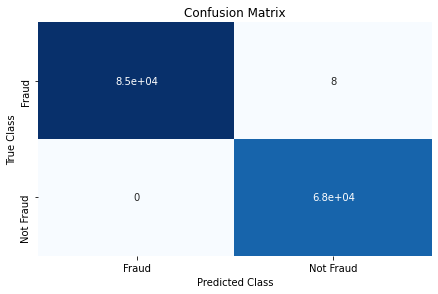

In [33]:
matrix = confusion_matrix(y_test, y_pred)

dataframe = pd.DataFrame(matrix,index = ['Fraud','Not Fraud'],columns = ['Fraud','Not Fraud'])

sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [34]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85397
           1       1.00      1.00      1.00     68134

    accuracy                           1.00    153531
   macro avg       1.00      1.00      1.00    153531
weighted avg       1.00      1.00      1.00    153531



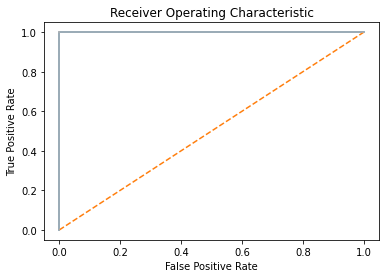

In [35]:
target_probabilities = model.predict_proba(X_test)[:,1]

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,
target_probabilities)

plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")                                                              
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

## Artificial Neural Network

In [41]:
classifier = Sequential()

In [42]:
classifier.add(Dense(units = 6,kernel_initializer = 'he_normal',activation = 'relu',input_dim= 30))

In [43]:
classifier.add(Dense(units = 6,kernel_initializer = 'he_normal',activation = 'relu'))

In [44]:
classifier.add(Dense(units = 1,kernel_initializer = 'glorot_uniform',activation = 'sigmoid'))

In [45]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [46]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size= 10, epochs=10)

Epoch 1/10
24002/24002 [==============================] - 34s 1ms/step - loss: 0.1175 - accuracy: 0.9558 - val_loss: 0.0930 - val_accuracy: 0.9646
Epoch 2/10
24002/24002 [==============================] - 34s 1ms/step - loss: 0.0818 - accuracy: 0.9659 - val_loss: 0.0726 - val_accuracy: 0.9693
Epoch 3/10
24002/24002 [==============================] - 41s 2ms/step - loss: 0.0651 - accuracy: 0.9747 - val_loss: 0.0604 - val_accuracy: 0.9766
Epoch 4/10
24002/24002 [==============================] - 37s 2ms/step - loss: 0.0570 - accuracy: 0.9783 - val_loss: 0.0566 - val_accuracy: 0.9771
Epoch 5/10
24002/24002 [==============================] - 39s 2ms/step - loss: 0.0526 - accuracy: 0.9805 - val_loss: 0.0521 - val_accuracy: 0.9820
Epoch 6/10
24002/24002 [==============================] - 39s 2ms/step - loss: 0.0499 - accuracy: 0.9823 - val_loss: 0.0495 - val_accuracy: 0.9818
Epoch 7/10
24002/24002 [==============================] - 36s 1ms/step - loss: 0.0477 - accuracy: 0.9841 - val_loss: 0

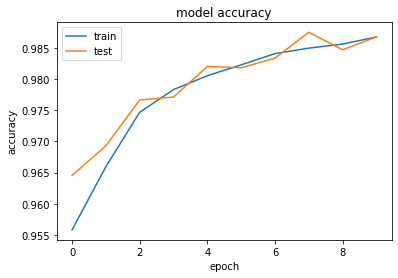

In [47]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

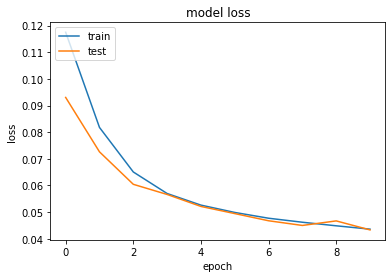

In [48]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc = 'upper left')
plt.show()

In [65]:
y_pred = classifier.predict(X_test)

In [71]:
confusion_matrix(y_test, y_pred.round())

array([[83690,  1707],
       [  294, 67840]])

## Gradient Boosting

In [15]:
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [16]:
y_pred = clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.9914544945320489

## Performance of all the models

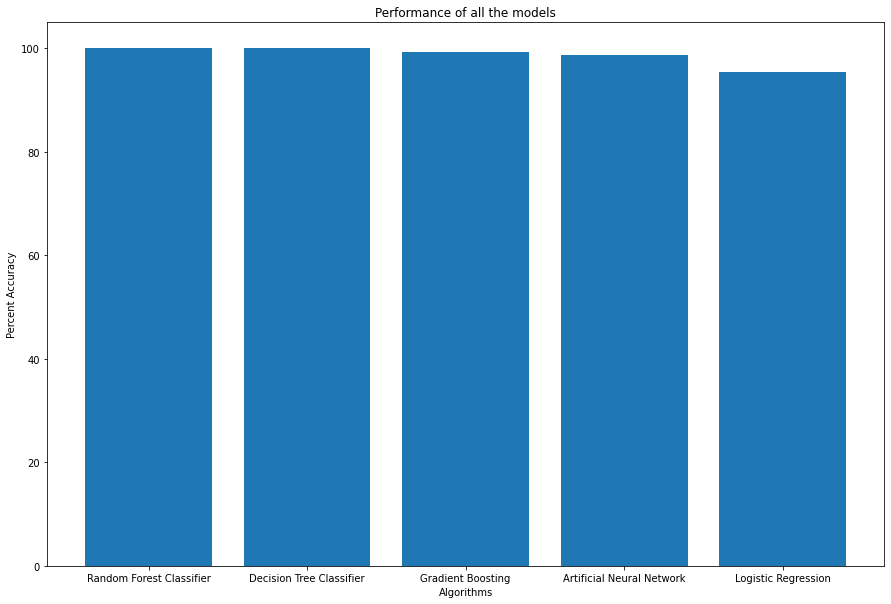

In [21]:
x = ['Random Forest Classifier','Decision Tree Classifier','Gradient Boosting','Artificial Neural Network','Logistic Regression']
plt.figure(figsize=(15,10))
plt.bar(x,height = [99.99478932593417,99.97459796392911,99.14544945320489,98.68,95.38985612026236])
plt.xlabel('Algorithms')
plt.ylabel('Percent Accuracy')
plt.title('Performance of all the models')
plt.show()